In [2]:
# Import packages and libraries
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt

#pandas plotting
from pandas.plotting import autocorrelation_plot

#autocorrelation
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(20,20))
plt.style.use("fivethirtyeight")

<Figure size 1440x1440 with 0 Axes>

In [3]:
df = pd.read_csv('fcc_output_v2.csv', parse_dates=['max_date'])


C:\Users\E1211281\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.drop_duplicates(keep=False)

In [4]:
df.set_index('max_date')

dates weekday    min_date accounting_date  \
max_date                                                              
2018-01-01  2018-01-01 00:00:00  Monday  2017-12-28      2018-01-01   
2018-01-01  2018-01-01 00:00:00  Monday  2017-12-28      2018-01-01   
2018-01-01  2018-01-01 00:00:00  Monday  2017-12-28      2018-01-01   
2018-01-01  2018-01-01 00:00:00  Monday  2017-12-28      2018-01-01   
2018-01-01  2018-01-01 00:00:00  Monday  2017-12-28      2018-01-01   
...                         ...     ...         ...             ...   
2020-01-31  2020-01-31 00:00:00  Friday  2020-01-27      2020-01-31   
2020-01-31  2020-01-31 00:00:00  Friday  2020-01-27      2020-01-31   
2020-01-31  2020-01-31 00:00:00  Friday  2020-01-27      2020-01-31   
2020-01-31  2020-01-31 00:00:00  Friday  2020-01-27      2020-01-31   
2020-01-31  2020-01-31 00:00:00  Friday  2020-01-27      2020-01-31   

            customer_id                         customer_name  \
max_date                                                        
2018-01-01     70185520               C.J. LANG & SON LIMITED   
2018-01-01     70135746  BELLAVISTA NURSING HOMES (WALES) LTD   
2018-01-01     70594846   LEISURE PARKS LUXURY LIVING LIMITED   
2018-01-01     70133683                             EXTEL LTD   
2018-01-01     70414525          CARELINE LIFESTYLES (UK) LTD   
...                 ...                                   ...   
2020-01-31     70680292             BLACKMAGIC DESIGN LIMITED   
2020-01-31     70648166                     FISH4DOGS LIMITED   
2020-01-31     70680292             BLACKMAGIC DESIGN LIMITED   
2020-01-31     70212447         GCH (ALAN MORKHILL HOUSE) LTD   
2020-01-31     70661645                  GRESHAM CARE LIMITED   

                                             customer_segment signage  \
max_date                                                                
2018-01-01  WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VE...       D   
2018-01-01            HUMAN HEALTH AND SOCIAL WORK ACTIVITIES       D   
2018-01-01          ACCOMMODATION AND FOOD SERVICE ACTIVITIES       D   
2018-01-01            HUMAN HEALTH AND SOCIAL WORK ACTIVITIES       D   
2018-01-01      ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES       D   
...                                                       ...     ...   
2020-01-31                                   UNABLE TO DEFINE       C   
2020-01-31                                      MANUFACTURING       C   
2020-01-31                                   UNABLE TO DEFINE       C   
2020-01-31            HUMAN HEALTH AND SOCIAL WORK ACTIVITIES       D   
2020-01-31                                   UNABLE TO DEFINE       D   

                                 txn_type payment_type  total_transactions  \
max_date                                                                     
2018-01-01                  CASH CHANNELS         Cash                   1   
2018-01-01                       CASH ATM         Cash                   3   
2018-01-01                       CASH ATM         Cash                   2   
2018-01-01                       CASH ATM         Cash                  11   
2018-01-01                       CASH ATM         Cash                   1   
...                                   ...          ...                 ...   
2020-01-31  {DOMESTIC/INTERNATIONAL} WIRE         Intl                   3   
2020-01-31  {DOMESTIC/INTERNATIONAL} WIRE         Intl                   1   
2020-01-31  {DOMESTIC/INTERNATIONAL} WIRE         Intl                   3   
2020-01-31                  CASH CHANNELS         Cash                   1   
2020-01-31                  CASH CHANNELS         Cash                   2   

            total_amount_gbp instructed_currency account_currency  \
max_date                                                            
2018-01-01          -1531.03                 NaN              GBP   
2018-01-01           -900.00                 NaN              GBP   
2018-01-01     

In [5]:
df3 = df[['total_amount_gbp', 'max_date']]
df3['max_date'] =  pd.to_datetime(df3['max_date'])
df3 = df3.set_index('max_date')

<ipython-input-5-f77ee415cbec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['max_date'] =  pd.to_datetime(df3['max_date'])


In [6]:
g = df3.groupby(pd.Grouper(freq="M"))  
df4 = g.sum()

In [7]:
df4

total_amount_gbp
max_date                    
2018-01-31     -1.552533e+09
2018-02-28     -1.559642e+09
2018-03-31     -1.652360e+09
2018-04-30     -1.789117e+09
2018-05-31     -1.861170e+09
2018-06-30     -1.774672e+09
2018-07-31     -1.904789e+09
2018-08-31     -1.869987e+09
2018-09-30     -1.632014e+09
2018-10-31     -2.010346e+09
2018-11-30     -1.814607e+09
2018-12-31     -2.066175e+09
2019-01-31     -1.456039e+09
2019-02-28     -1.557720e+09
2019-03-31     -1.196288e+09
2019-04-30     -1.359489e+09
2019-05-31     -1.392901e+09
2019-06-30     -1.195130e+09
2019-07-31     -1.345879e+09
2019-08-31     -1.061801e+09
2019-09-30     -1.252190e+09
2019-10-31     -1.007737e+09
2019-11-30     -1.079977e+09
2019-12-31     -1.192529e+09
2020-01-31     -4.697309e+08

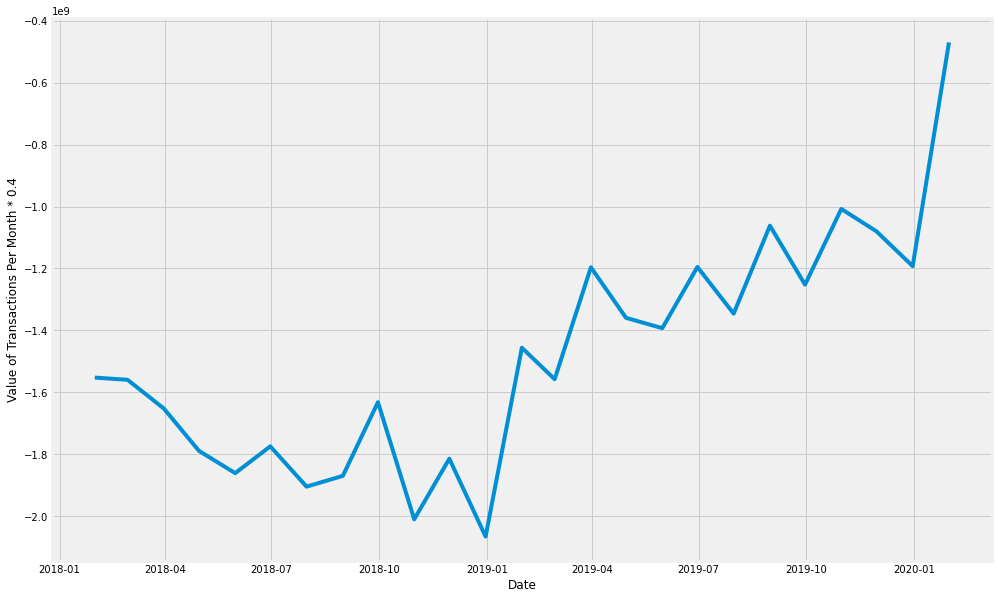

In [8]:
%matplotlib inline
plt.figure(figsize=(15,10)) 
plt.xlabel('Date')
plt.ylabel('Value of Transactions Per Month * 0.4')
plt.plot(df4)

<Figure size 1080x1440 with 0 Axes>

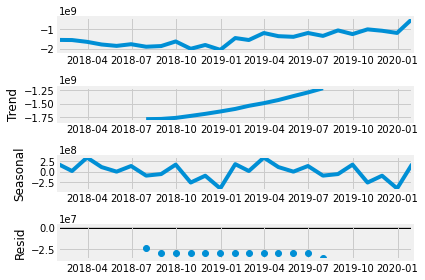

In [9]:
plt.figure(figsize=(15,20)) 
fig = seasonal_decompose(df4).plot()

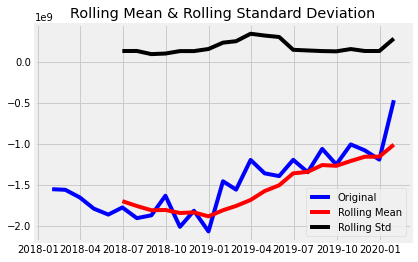

In [10]:
rolling_mean = df4.rolling(window = 6).mean()
rolling_std = df4.rolling(window = 6).std()
plt.plot(df4, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [11]:
result = adfuller(df4['total_amount_gbp'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.47247072999460865
p-value: 0.9840119069077582
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [12]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

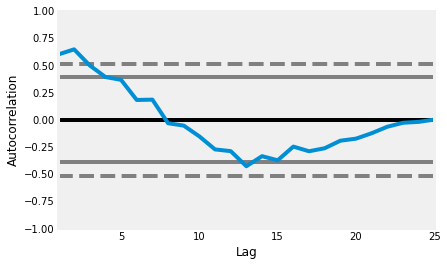

In [13]:
fig = autocorrelation_plot(df4)

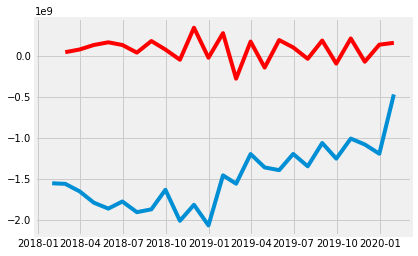

In [14]:
decomposition = seasonal_decompose(df4) 
model = ARIMA(df4, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df4)
plt.plot(results.fittedvalues, color='red')

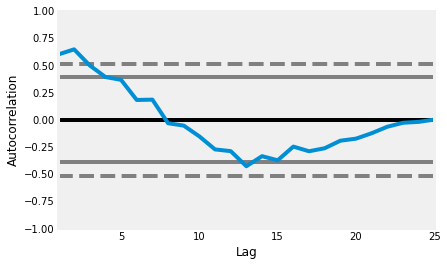

In [15]:
fig = autocorrelation_plot(df4)

C:\Users\E1211281\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


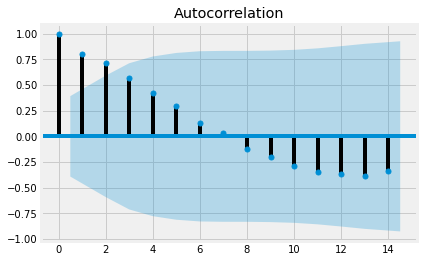

In [16]:
#identify autocorrelation and lag step
fig = plot_acf(acf(df4,nlags=30))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train,test = train_test_split(df4,train_size=0.8,shuffle=False)

In [32]:
model = ARIMA(df4.total_amount_gbp,order=[2,2,2])
model_fit = model.fit(disp=0,typ="levels")
forecast = model_fit.forecast()
prediction = forecast[0][0]
true_value = test[:1].values[0][0]
print(f"{prediction}, {true_value}")

-532855376.30037296, -1252189547.2500014


C:\Users\E1211281\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


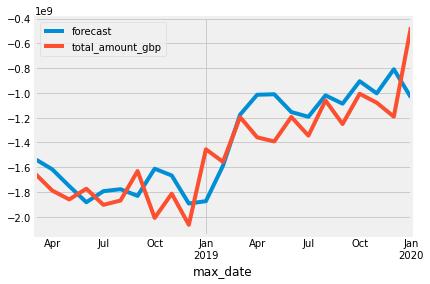

In [33]:
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\E1211281\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


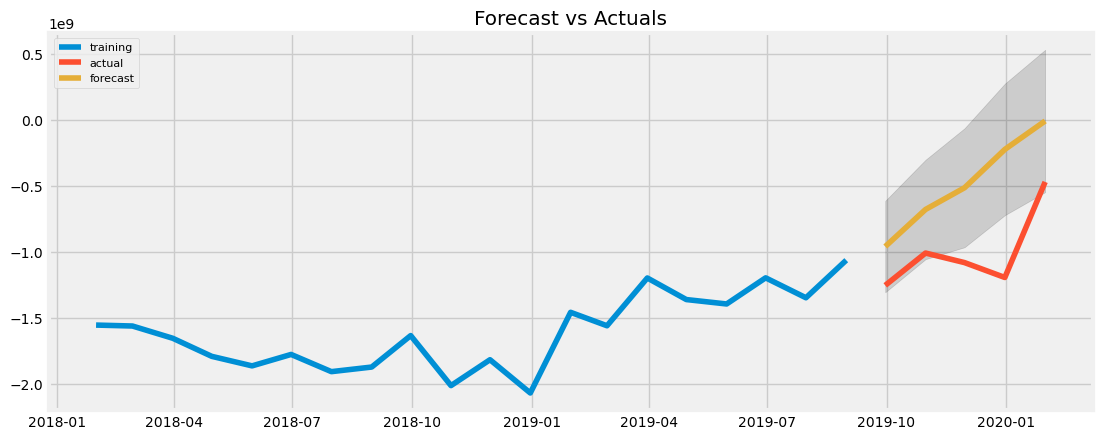

In [34]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2, 2, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(5, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [48]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe})

forecast_accuracy(fc, test.values)

{'mape': 0.584449224901582,
 'me': 523900541.8384971,
 'mae': 583180472.4085752,
 'mpe': -0.4582494696487091}